# Introduction to high-level tensorflow 2.0 using keras
(adapted from https://www.tensorflow.org/tutorials/quickstart/beginner).

In [1]:
# get tensorflow 2.0 (run once per session)
pip install tensorflow==2.0

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print('tensorflow version: ' + tf.__version__)

tensorflow version: 2.0.0


In [3]:
# load mnist dataset
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # customary normalization to [0, 1]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# Standard Scaling the data
print('Train', x_train.min(), x_train.max(), x_train.mean(), x_train.std())
print('Test', x_test.min(), x_test.max(), x_test.mean(), x_test.std())

x_train = (x_train-x_train.mean())/x_train.std()
x_test = (x_test-x_test.mean())/x_test.std()

print('Train', x_train.min(), x_train.max(), x_train.mean(), x_train.std())
print('Test', x_test.min(), x_test.max(), x_test.mean(), x_test.std())

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
Train 0.0 1.0 0.1306604762738429 0.3081078038564622
Test 0.0 1.0 0.13251460584233699 0.3104802479305348
Train -0.4240738943915667 2.8215433456893395 -8.196738828119618e-17 1.000000000000001
Test -0.4268052693386959 2.794011535161327 -2.251287591722145e-16 1.0000000000000004


## Simple, one-layer, fully-connected neural network

In [0]:
# define the sequential model (i.e., each layer follows sequentially from the previous)
simple_model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # fully-connected, so flatten the image
    tf.keras.layers.Dense(units=128, activation='relu'),  # hidden layer has 128 units
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')  # length-10 output for classification
])

simple_model.compile(optimizer='adam',  # pick an optimizer
                     loss='sparse_categorical_crossentropy',  # pick a loss
                     metrics=['accuracy'])  # pick a metric to monitor

In [5]:
# train model and track validation loss after each epoch:
simple_model.fit(x_train, y_train,
                 epochs=5,
                 batch_size=32,
                 validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 119us/sample - loss: 0.4046 - accuracy: 0.8764 - val_loss: 0.1649 - val_accuracy: 0.9485
Epoch 2/5
60000/60000 [==============================] - 6s 104us/sample - loss: 0.2406 - accuracy: 0.9267 - val_loss: 0.1262 - val_accuracy: 0.9622
Epoch 3/5
60000/60000 [==============================] - 6s 98us/sample - loss: 0.2123 - accuracy: 0.9365 - val_loss: 0.1146 - val_accuracy: 0.9649
Epoch 4/5
60000/60000 [==============================] - 6s 98us/sample - loss: 0.1924 - accuracy: 0.9415 - val_loss: 0.1033 - val_accuracy: 0.9691
Epoch 5/5
60000/60000 [==============================] - 6s 103us/sample - loss: 0.1780 - accuracy: 0.9448 - val_loss: 0.1093 - val_accuracy: 0.9685


In [6]:
# let's examine some sample predictions:
prediction = simple_model.predict_classes(x_test)

# incorrect predictions:
incorrect = prediction != y_test
incorrect_indices = np.where(incorrect)[0]
print('error rate = ' + str(np.mean(incorrect)))  # should be 1 - val_accuracy
print('These are the indices corresponding to the test samples that our model got wrong:')
print(incorrect_indices)

error rate = 0.0315
These are the indices corresponding to the test samples that our model got wrong:
[   8  149  151  233  241  247  259  300  320  321  362  381  412  445
  448  449  478  479  495  551  582  619  646  659  684  691  707  720
  726  740  839  844  881  924  956  965  982 1003 1014 1044 1107 1112
 1181 1206 1226 1228 1232 1247 1260 1283 1319 1326 1364 1393 1414 1469
 1494 1500 1522 1527 1530 1549 1553 1569 1609 1681 1709 1717 1737 1751
 1754 1790 1800 1850 1878 1901 1952 1970 2004 2016 2035 2040 2043 2044
 2053 2068 2093 2098 2109 2118 2129 2130 2135 2182 2186 2189 2224 2237
 2266 2272 2293 2299 2325 2369 2380 2387 2393 2406 2414 2433 2462 2488
 2578 2598 2607 2648 2654 2730 2760 2810 2877 2896 2921 2927 2939 2953
 3005 3030 3060 3073 3100 3117 3206 3225 3240 3289 3329 3330 3336 3405
 3422 3490 3503 3520 3549 3558 3559 3565 3567 3597 3604 3629 3662 3674
 3716 3751 3767 3776 3780 3808 3811 3817 3821 3838 3853 3869 3893 3906
 3926 3941 3968 3976 3985 4007 4065 4078 4163 

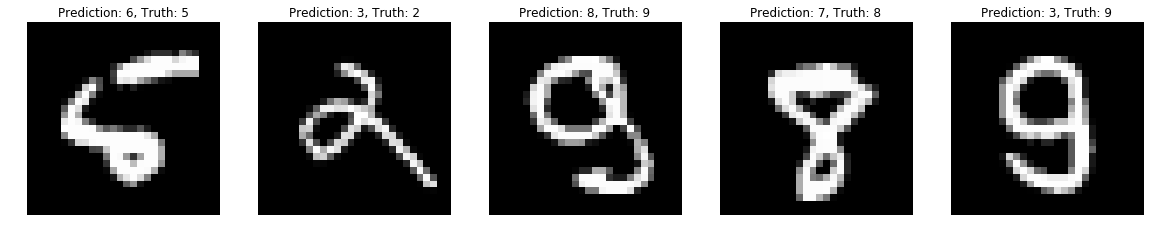

In [7]:
# plot 5 examples of wrong classifications:
plt.figure(figsize=(20, 5))
for i, i_wrong in enumerate(incorrect_indices[:5]):
  plt.subplot(1, 5, i + 1)
  plt.imshow(x_test[i_wrong], cmap='gray')
  plt.title('Prediction: ' + str(prediction[i_wrong]) + ', Truth: ' + str(y_test[i_wrong]))
  plt.axis('off')
plt.show()

## Convolutional neural network example

In [0]:
# because we're using CNNs, the data needs a channel dimension:
x_train = x_train[..., None]
x_test = x_test[..., None]

In [0]:
cnn_model = tf.keras.models.Sequential([
    # let's add some convolutional layers:
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=2, padding='same', activation='relu'),
    # now, let's transition into a fully-connected layer; first, we flatten:
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=64, activation='relu'),
    #tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')  # length-10 output for classification
])

cnn_model.compile(optimizer='adam',  # pick an optimizer
                     loss='sparse_categorical_crossentropy',  # pick a loss
                     metrics=['accuracy'])  # pick a metric to monitor

In [10]:
# train model and track validation loss after each epoch:
cnn_model.fit(x_train, y_train,
              epochs=2,
              batch_size=32,
              validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 64s 1ms/sample - loss: 0.1334 - accuracy: 0.9592 - val_loss: 0.0520 - val_accuracy: 0.9832
Epoch 2/2
60000/60000 [==============================] - 64s 1ms/sample - loss: 0.0433 - accuracy: 0.9863 - val_loss: 0.0453 - val_accuracy: 0.9849


In [11]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  320       
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  9248      
_________________________________________________________________
flatten_1 (Flatten)          multiple                  0         
_________________________________________________________________
dense_2 (Dense)              multiple                  401472    
_________________________________________________________________
dense_3 (Dense)              multiple                  650       
Total params: 411,690
Trainable params: 411,690
Non-trainable params: 0
_________________________________________________________________
